In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [32]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_presentation_yue/model_Goose_1st'



train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256)

In [33]:
len(train_loader), len(val_loader), len(test_loader)

(78, 25, 25)

In [34]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256)
print(len(train_loader), len(val_loader), len(test_loader))
## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

78 11 25


In [35]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 62, 100, 10])
torch.Size([256, 1])
256
256
256


date:180325, rec:002, time:510.0


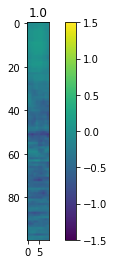

date:180401, rec:001, time:4677.0


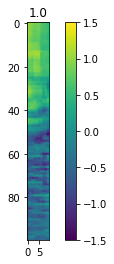

date:180325, rec:007, time:2606.0


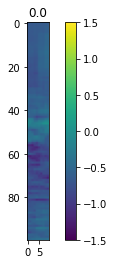

date:180325, rec:007, time:5573.0


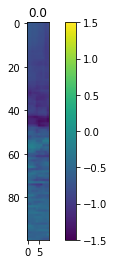

date:180325, rec:007, time:6383.0


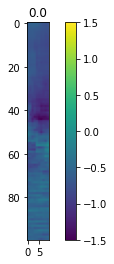

date:180325, rec:009, time:1360.0


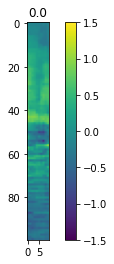

date:180324, rec:009, time:170.0


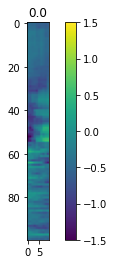

date:180325, rec:003, time:4613.0


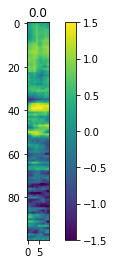

date:180325, rec:004, time:130.0


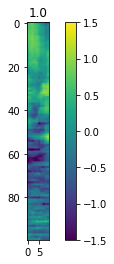

date:180324, rec:008, time:2458.0


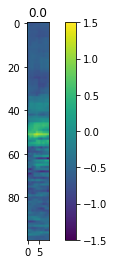

date:180324, rec:008, time:2488.0


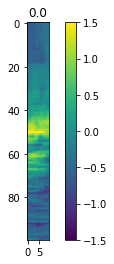

date:180323, rec:001, time:830.0


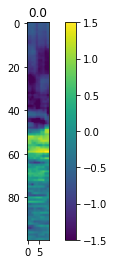

date:180401, rec:001, time:5337.0


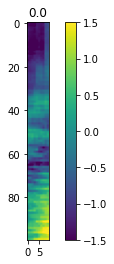

date:180323, rec:005, time:3843.0


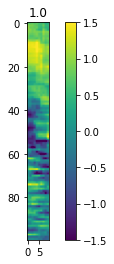

date:180324, rec:009, time:1067.0


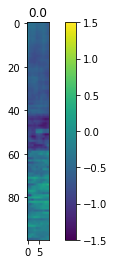

date:180324, rec:008, time:2848.0


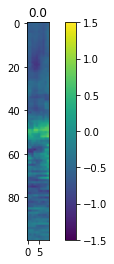

date:180325, rec:009, time:4849.0


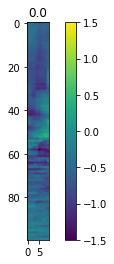

date:180324, rec:009, time:1662.0


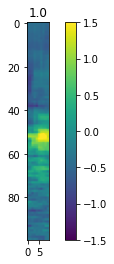

date:180325, rec:007, time:3598.0


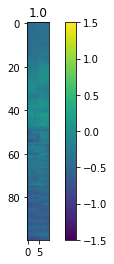

date:180325, rec:001, time:5662.0


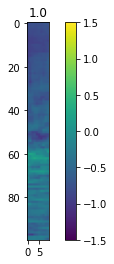

date:180325, rec:007, time:5933.0


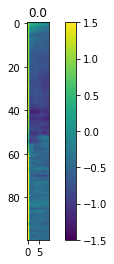

date:180324, rec:001, time:6547.0


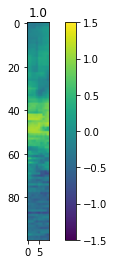

date:180325, rec:007, time:6663.0


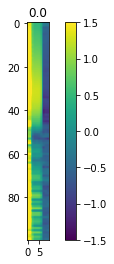

date:180325, rec:007, time:6383.0


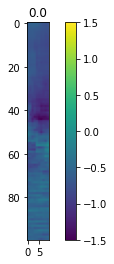

date:180324, rec:009, time:610.0


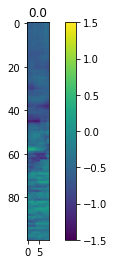

date:180325, rec:001, time:4596.0


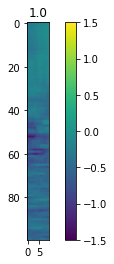

date:180325, rec:001, time:5026.0


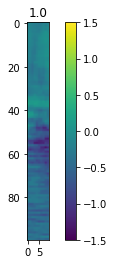

date:180324, rec:008, time:1381.0


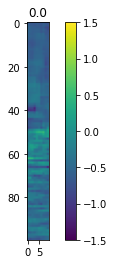

date:180325, rec:007, time:5073.0


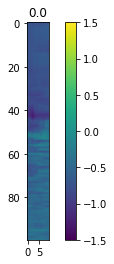

date:180324, rec:009, time:360.0


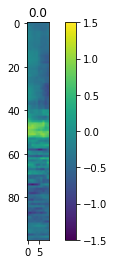

date:180324, rec:001, time:1266.0


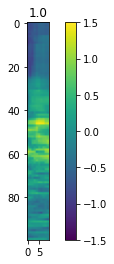

date:180325, rec:001, time:670.0


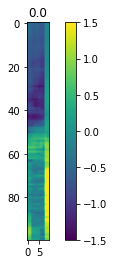

date:180401, rec:001, time:460.0


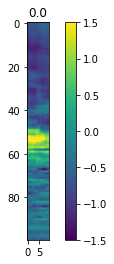

date:180401, rec:002, time:6474.0


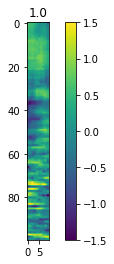

date:180322, rec:007, time:4400.0


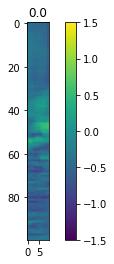

date:180324, rec:001, time:50.0


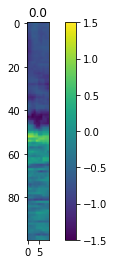

date:180322, rec:005, time:3101.0


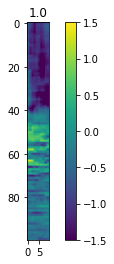

date:180401, rec:001, time:3876.0


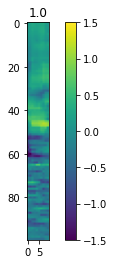

date:180325, rec:009, time:4979.0


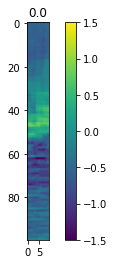

date:180324, rec:001, time:868.0


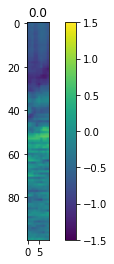

date:180325, rec:007, time:6823.0


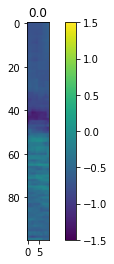

date:180323, rec:001, time:3895.0


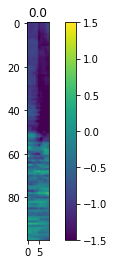

date:180323, rec:007, time:5234.0


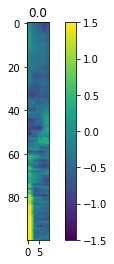

date:180325, rec:007, time:4313.0


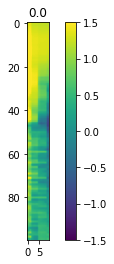

date:180325, rec:009, time:4949.0


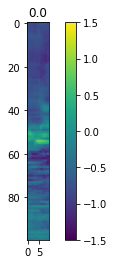

date:180325, rec:007, time:1558.0


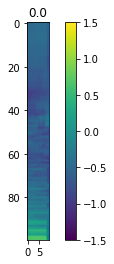

date:180323, rec:007, time:2925.0


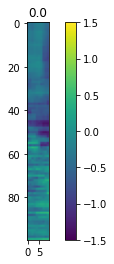

date:180325, rec:003, time:632.0


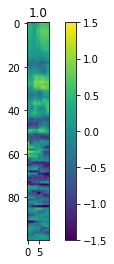

date:180325, rec:002, time:910.0


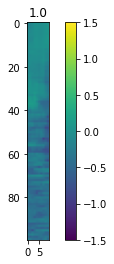

date:180325, rec:001, time:5146.0


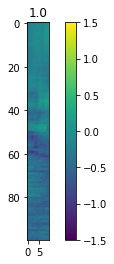

date:180323, rec:002, time:4935.0


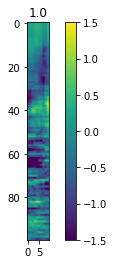

date:180323, rec:004, time:4339.0


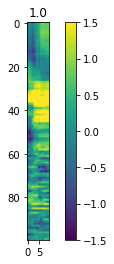

date:180323, rec:004, time:4609.0


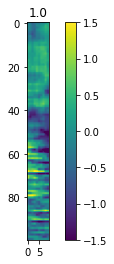

date:180323, rec:004, time:4359.0


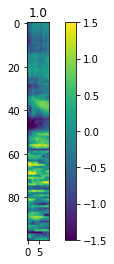

date:180325, rec:005, time:6103.0


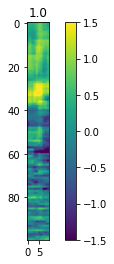

date:180325, rec:002, time:650.0


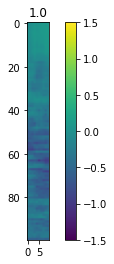

date:180322, rec:003, time:4957.0


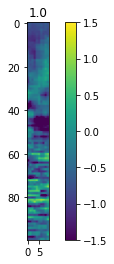

date:180322, rec:002, time:4109.0


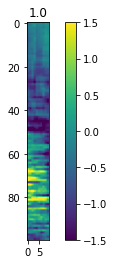

date:180325, rec:007, time:5053.0


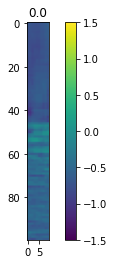

date:180325, rec:009, time:90.0


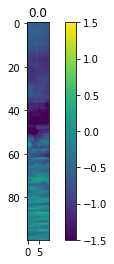

date:180401, rec:001, time:900.0


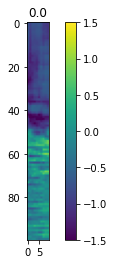

date:180322, rec:003, time:4659.0


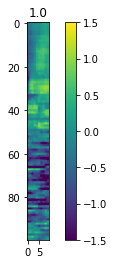

date:180322, rec:003, time:1955.0


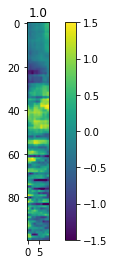

date:180324, rec:003, time:2846.0


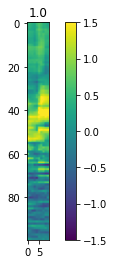

date:180324, rec:003, time:4345.0


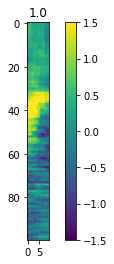

date:180324, rec:006, time:1272.0


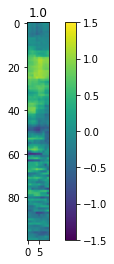

date:180325, rec:007, time:5893.0


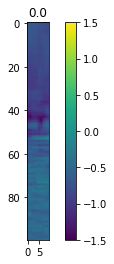

date:180401, rec:001, time:6013.0


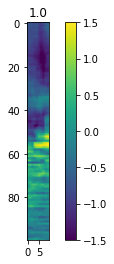

date:180325, rec:002, time:980.0


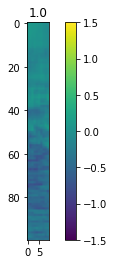

date:180325, rec:009, time:4469.0


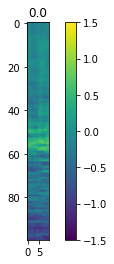

date:180325, rec:004, time:2740.0


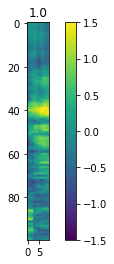

date:180325, rec:009, time:2040.0


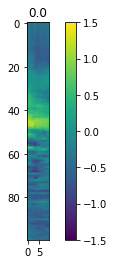

date:180324, rec:008, time:2378.0


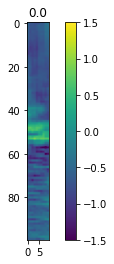

date:180322, rec:007, time:1377.0


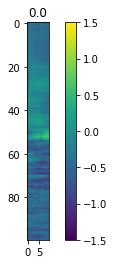

date:180401, rec:003, time:320.0


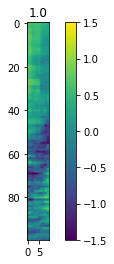

date:180322, rec:002, time:6511.0


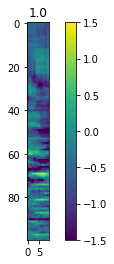

date:180325, rec:004, time:1103.0


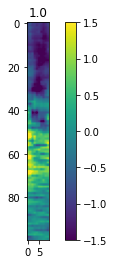

date:180325, rec:007, time:5493.0


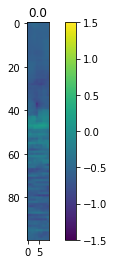

date:180325, rec:009, time:930.0


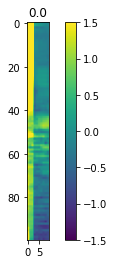

date:180324, rec:001, time:3025.0


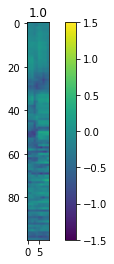

date:180324, rec:001, time:1316.0


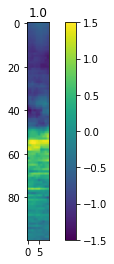

date:180324, rec:008, time:1791.0


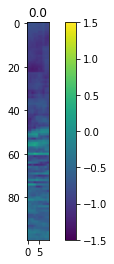

date:180324, rec:008, time:5194.0


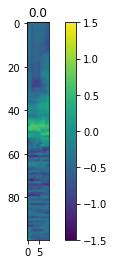

date:180324, rec:008, time:1511.0


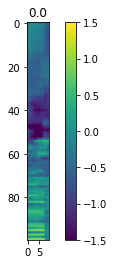

date:180324, rec:001, time:3045.0


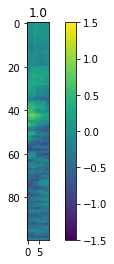

date:180323, rec:001, time:830.0


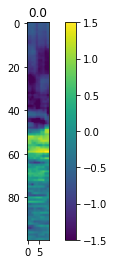

date:180325, rec:007, time:160.0


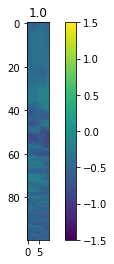

date:180323, rec:007, time:5591.0


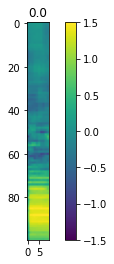

date:180325, rec:009, time:2480.0


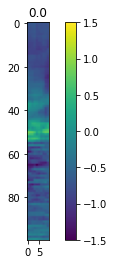

date:180325, rec:001, time:720.0


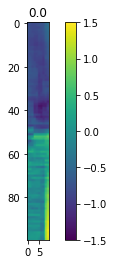

date:180401, rec:002, time:2996.0


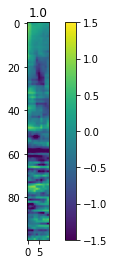

date:180325, rec:007, time:4673.0


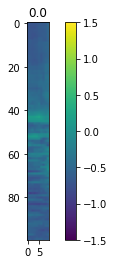

date:180325, rec:007, time:350.0


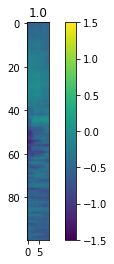

date:180322, rec:007, time:1477.0


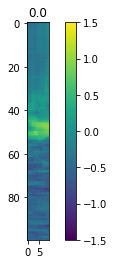

date:180325, rec:003, time:4483.0


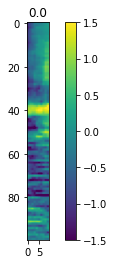

date:180323, rec:005, time:3551.0


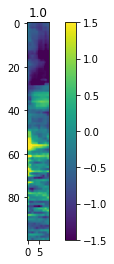

date:180324, rec:006, time:512.0


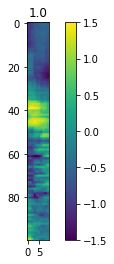

date:180325, rec:004, time:5556.0


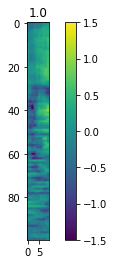

date:180323, rec:007, time:6991.0


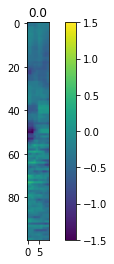

date:180324, rec:006, time:532.0


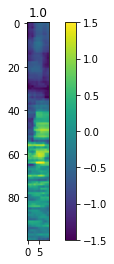

date:180322, rec:003, time:3168.0


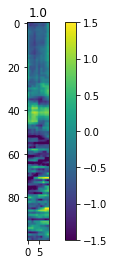

date:180322, rec:003, time:4837.0


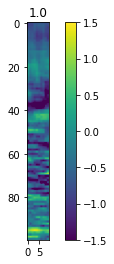

date:180322, rec:007, time:2253.0


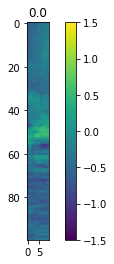

date:180323, rec:007, time:6551.0


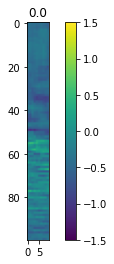

date:180325, rec:007, time:6403.0


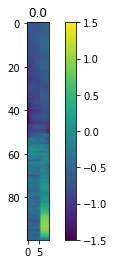

date:180322, rec:007, time:3309.0


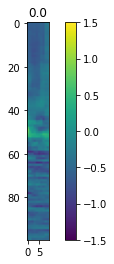

date:180325, rec:009, time:6500.0


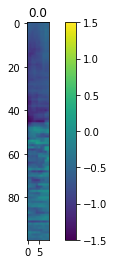

date:180324, rec:009, time:830.0


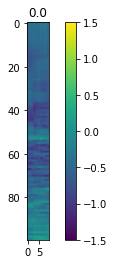

date:180324, rec:003, time:5168.0


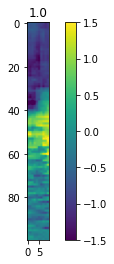

date:180325, rec:005, time:3046.0


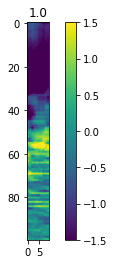

date:180325, rec:007, time:2966.0


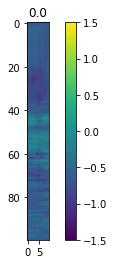

date:180323, rec:003, time:2761.0


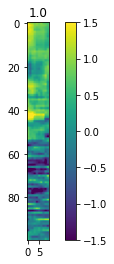

date:180324, rec:008, time:2758.0


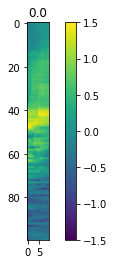

date:180325, rec:007, time:5763.0


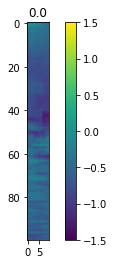

date:180324, rec:009, time:680.0


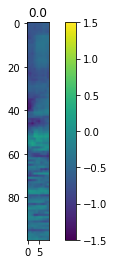

date:180323, rec:007, time:6991.0


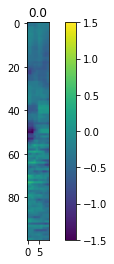

date:180322, rec:005, time:958.0


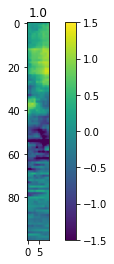

date:180324, rec:008, time:1691.0


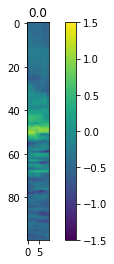

date:180325, rec:004, time:3330.0


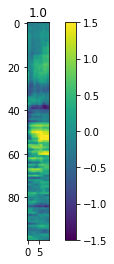

date:180325, rec:009, time:6480.0


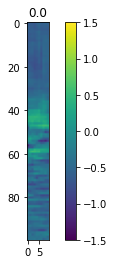

date:180325, rec:007, time:2223.0


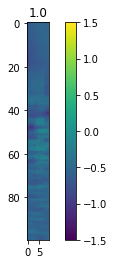

date:180324, rec:008, time:3713.0


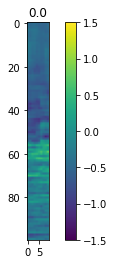

date:180324, rec:008, time:6794.0


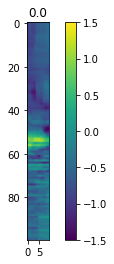

date:180325, rec:003, time:4533.0


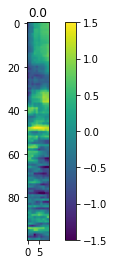

date:180322, rec:005, time:3051.0


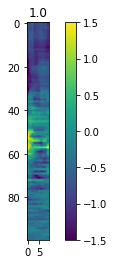

date:180325, rec:009, time:460.0


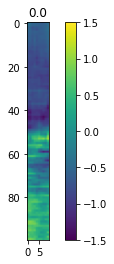

date:180324, rec:001, time:6399.0


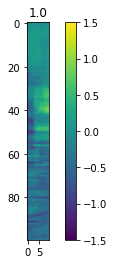

date:180324, rec:008, time:6794.0


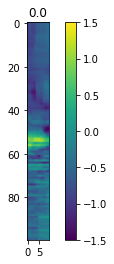

In [18]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [19]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'


model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [9]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.2406975030899048
Val loss for epoch 0: 0.5123814344406128
Train loss for epoch 1: 0.34593331813812256
Val loss for epoch 1: 0.6815013289451599
Train loss for epoch 2: 0.35499879717826843
Val loss for epoch 2: 0.8869746923446655
Train loss for epoch 3: 0.28017619252204895
Val loss for epoch 3: 0.6417834162712097
Train loss for epoch 4: 0.27796438336372375
Val loss for epoch 4: 0.9181208610534668
Train loss for epoch 5: 0.2447347193956375
Val loss for epoch 5: 0.6918726563453674
Train loss for epoch 6: 0.22872936725616455
Val loss for epoch 6: 0.8059713840484619
Train loss for epoch 7: 0.24354302883148193
Val loss for epoch 7: 0.7064383029937744
Train loss for epoch 8: 0.2032863348722458
Val loss for epoch 8: 1.3005207777023315
Train loss for epoch 9: 0.19611772894859314
Val loss for epoch 9: 1.093339204788208
Train loss for epoch 10: 0.16846108436584473
Val loss for epoch 10: 0.9939906597137451
Train loss for epoch 11: 0.18250474333763123
Val loss for epoch 11:

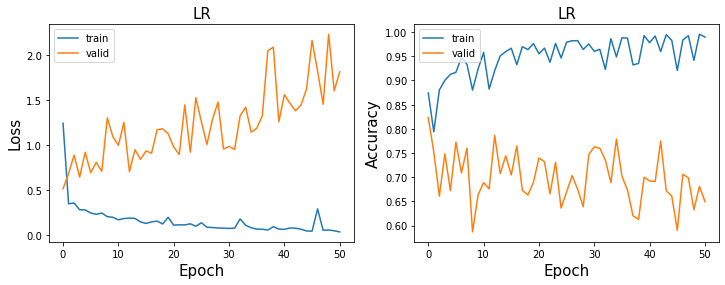

In [10]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [21]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0          0


In [23]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_presentation_yue/model_Goose_1st/LR_CHall_LOSSbce_REGnone0_EPOCH0_REDUCEsum_valbalanced.pt'

### Logistic regression with L2 regularization

In [36]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [42]:
path

'/mnt/pesaranlab/People/Capstone_students/Yue/model/model_presentation_yue/model_Goose_1st'

Train loss for epoch 0: 0.9610732793807983
Val loss for epoch 0: 1.0845698118209839
Train loss for epoch 1: 0.4957540035247803
Val loss for epoch 1: 1.1238969564437866
Train loss for epoch 2: 0.3286832273006439
Val loss for epoch 2: 0.6429513096809387
2
Train loss for epoch 3: 0.2844175696372986
Val loss for epoch 3: 0.5423027873039246
3
Train loss for epoch 4: 0.3000688850879669
Val loss for epoch 4: 1.3078289031982422
Train loss for epoch 5: 0.25660327076911926
Val loss for epoch 5: 0.6097710132598877
Train loss for epoch 6: 0.23104673624038696
Val loss for epoch 6: 0.7609387636184692
Train loss for epoch 7: 0.21978244185447693
Val loss for epoch 7: 0.7527686357498169
Train loss for epoch 8: 0.19561424851417542
Val loss for epoch 8: 1.1029754877090454
Train loss for epoch 9: 0.19832764565944672
Val loss for epoch 9: 0.787643551826477
Train loss for epoch 10: 0.19142793118953705
Val loss for epoch 10: 0.8595820069313049
Train loss for epoch 11: 0.20982232689857483
Val loss for epoch 1

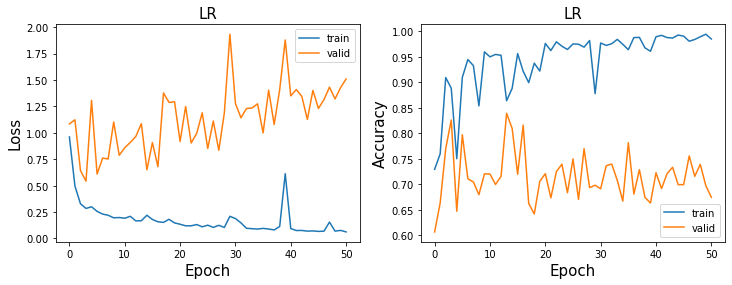

Train loss for epoch 0: 1.125179409980774
Val loss for epoch 0: 2.1021580696105957
Train loss for epoch 1: 1.0422276258468628
Val loss for epoch 1: 2.568289279937744
Train loss for epoch 2: 1.0456905364990234
Val loss for epoch 2: 1.8393588066101074
2
Train loss for epoch 3: 0.7555265426635742
Val loss for epoch 3: 1.3526976108551025
3
Train loss for epoch 4: 0.8036521673202515
Val loss for epoch 4: 1.3862547874450684
Train loss for epoch 5: 0.6474696397781372
Val loss for epoch 5: 0.9050217270851135
5
Train loss for epoch 6: 0.5589319467544556
Val loss for epoch 6: 0.8731751441955566
6
Train loss for epoch 7: 0.6293677687644958
Val loss for epoch 7: 0.8856989741325378
Train loss for epoch 8: 0.7320842146873474
Val loss for epoch 8: 0.9452673196792603
Train loss for epoch 9: 0.5564925670623779
Val loss for epoch 9: 1.3603938817977905
Train loss for epoch 10: 0.576606035232544
Val loss for epoch 10: 0.7959243655204773
10
Train loss for epoch 11: 0.40241727232933044
Val loss for epoch 11

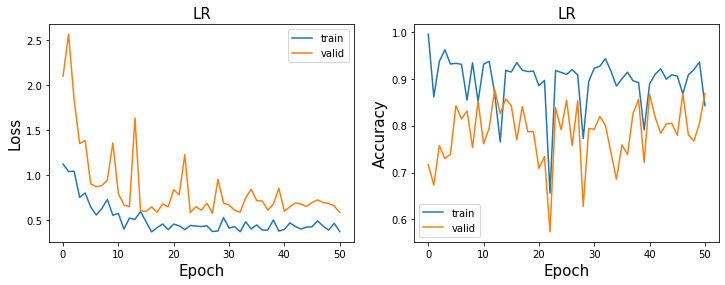

Train loss for epoch 0: 0.5093243718147278
Val loss for epoch 0: 0.7811905741691589
Train loss for epoch 1: 0.5469196438789368
Val loss for epoch 1: 1.0075184106826782
Train loss for epoch 2: 0.6062623262405396
Val loss for epoch 2: 0.7790908217430115
2
Train loss for epoch 3: 0.5257893204689026
Val loss for epoch 3: 0.7768681049346924
3
Train loss for epoch 4: 0.5241215229034424
Val loss for epoch 4: 0.7176969647407532
4
Train loss for epoch 5: 0.5379034280776978
Val loss for epoch 5: 0.6338099837303162
5
Train loss for epoch 6: 0.5089257955551147
Val loss for epoch 6: 0.6594427824020386
Train loss for epoch 7: 0.580045759677887
Val loss for epoch 7: 0.7302446365356445
Train loss for epoch 8: 0.5117537975311279
Val loss for epoch 8: 0.7008472681045532
Train loss for epoch 9: 0.5354453325271606
Val loss for epoch 9: 0.6981035470962524
Train loss for epoch 10: 0.5889996886253357
Val loss for epoch 10: 0.6315661668777466
10
Train loss for epoch 11: 0.4647742807865143
Val loss for epoch 1

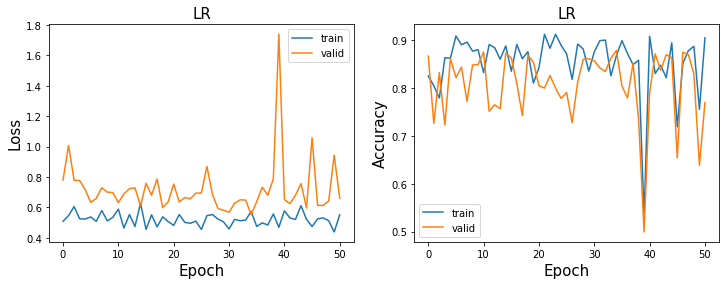

In [38]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [48]:
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model_LR = os.listdir(path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          3
50        27
100       34


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/LR_CHall_LOSSbce_REGl21_EPOCH3_REDUCEsum_valbalanced.pt


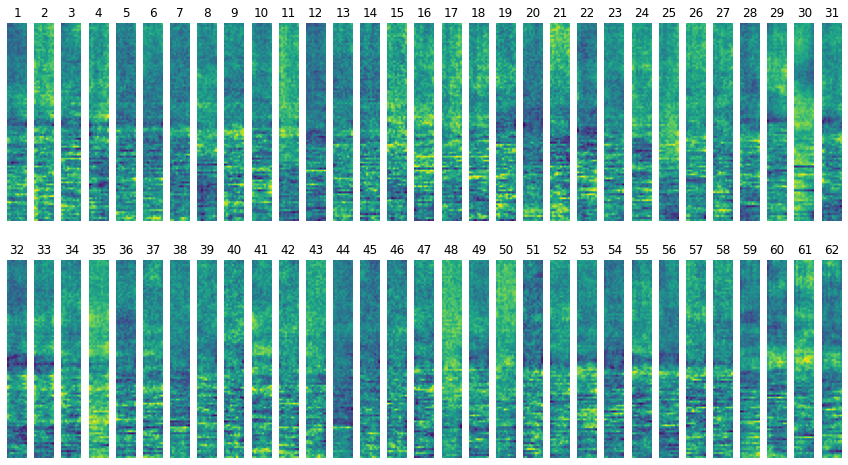

validation loss:0.5423027873039246 accuracy:0.8262806236080178
0.5
test loss:0.5404723882675171 accuracy:0.8135701712273964
0.7385182


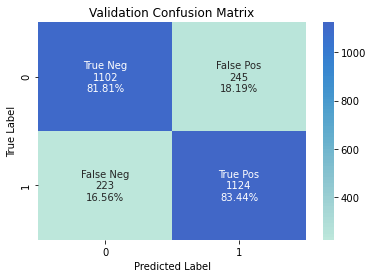

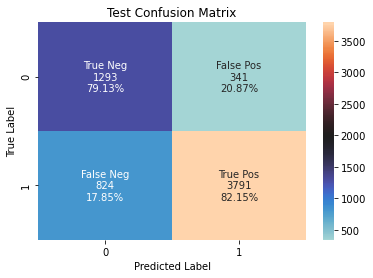

date:180329, rec:003, time:6696.0, label:1.0
Original data 62 CH


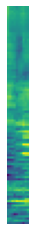

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/LR_CHall_LOSSbce_REGl250_EPOCH27_REDUCEsum_valbalanced.pt


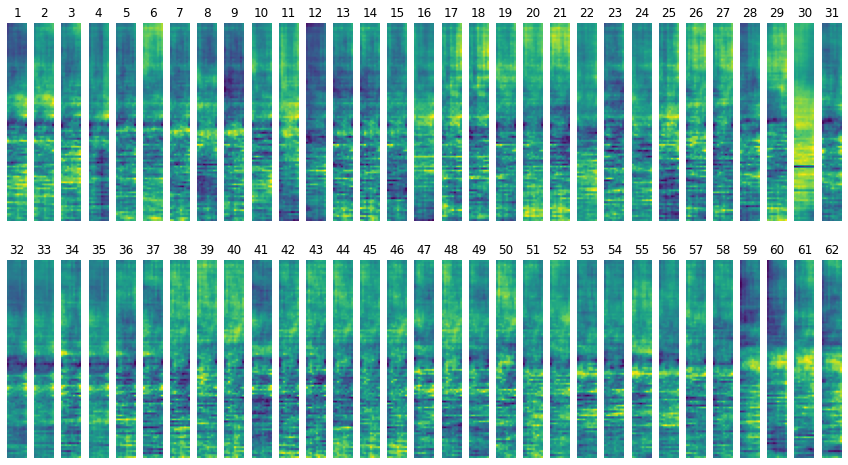

validation loss:0.5788859128952026 accuracy:0.8526354862657758
0.5
test loss:0.5084729790687561 accuracy:0.8550168026884302
0.7385182


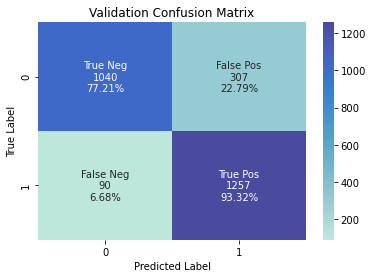

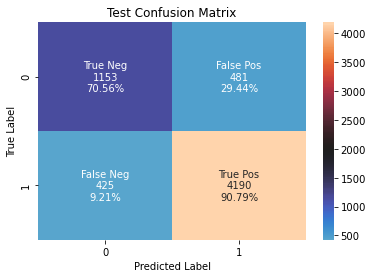

date:180329, rec:004, time:2444.0, label:1.0
Original data 62 CH


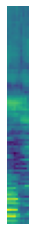

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/LR_CHall_LOSSbce_REGl2100_EPOCH34_REDUCEsum_valbalanced.pt


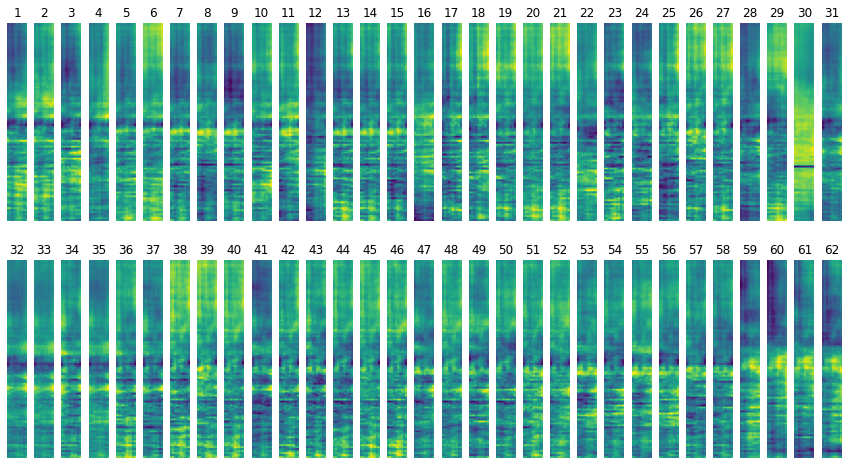

validation loss:0.5530384182929993 accuracy:0.878619153674833
0.5
test loss:0.4995712339878082 accuracy:0.8660585693710994
0.7385182


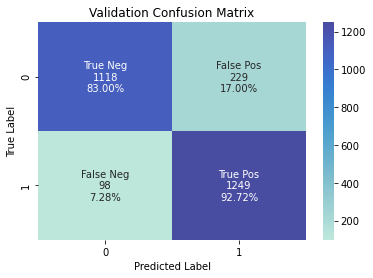

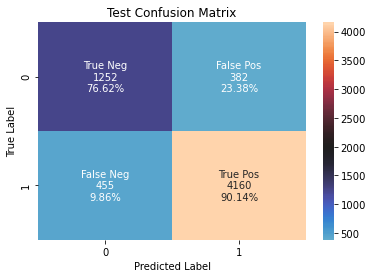

date:180329, rec:004, time:2444.0, label:1.0
Original data 62 CH


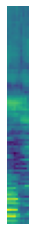

In [50]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    load_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [51]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 1.3769186735153198
Val loss for epoch 0: 0.7155148386955261
Train loss for epoch 1: 0.38874953985214233
Val loss for epoch 1: 1.4287924766540527
Train loss for epoch 2: 0.41380396485328674
Val loss for epoch 2: 0.5700178742408752
2
Train loss for epoch 3: 0.30307838320732117
Val loss for epoch 3: 0.5750432014465332
Train loss for epoch 4: 0.2622166872024536
Val loss for epoch 4: 0.8933289647102356
Train loss for epoch 5: 0.2546370327472687
Val loss for epoch 5: 1.1618614196777344
Train loss for epoch 6: 0.2644399404525757
Val loss for epoch 6: 0.865218460559845
Train loss for epoch 7: 0.2630637288093567
Val loss for epoch 7: 0.9599280953407288
Train loss for epoch 8: 0.22267188131809235
Val loss for epoch 8: 0.6659762859344482
Train loss for epoch 9: 0.20455265045166016
Val loss for epoch 9: 0.6780977845191956
Train loss for epoch 10: 0.25155821442604065
Val loss for epoch 10: 0.7976852059364319
Train loss for epoch 11: 0.21208670735359192
Val loss for epoch 11:

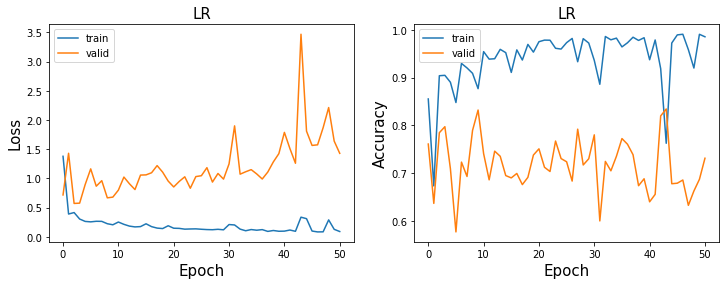

Train loss for epoch 0: 1.433337688446045
Val loss for epoch 0: 2.089573860168457
Train loss for epoch 1: 0.8538715839385986
Val loss for epoch 1: 1.9336371421813965
1
Train loss for epoch 2: 0.5688182711601257
Val loss for epoch 2: 1.2981946468353271
2
Train loss for epoch 3: 0.46871045231819153
Val loss for epoch 3: 0.9771860837936401
3
Train loss for epoch 4: 0.6809723377227783
Val loss for epoch 4: 0.9977743029594421
Train loss for epoch 5: 0.40450403094291687
Val loss for epoch 5: 0.9761919379234314
5
Train loss for epoch 6: 0.4099724590778351
Val loss for epoch 6: 0.9913455247879028
Train loss for epoch 7: 0.37718501687049866
Val loss for epoch 7: 1.091160535812378
Train loss for epoch 8: 0.39322683215141296
Val loss for epoch 8: 1.0493509769439697
Train loss for epoch 9: 0.48310908675193787
Val loss for epoch 9: 0.9311519265174866
9
Train loss for epoch 10: 0.3427542448043823
Val loss for epoch 10: 1.187049388885498
Train loss for epoch 11: 0.36416494846343994
Val loss for epoch

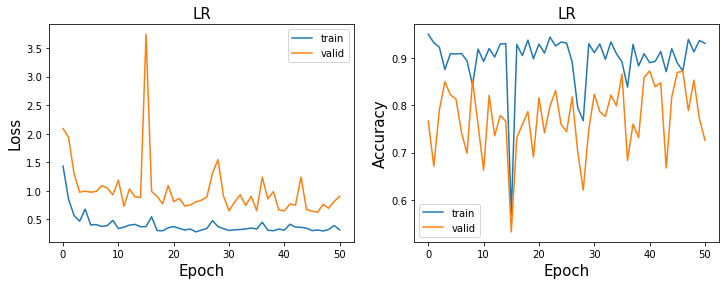

Train loss for epoch 0: 0.3716782033443451
Val loss for epoch 0: 0.7570469975471497
Train loss for epoch 1: 0.39206409454345703
Val loss for epoch 1: 0.8812806010246277
Train loss for epoch 2: 0.3628844618797302
Val loss for epoch 2: 0.8510609865188599
Train loss for epoch 3: 0.33932700753211975
Val loss for epoch 3: 0.7771652340888977
Train loss for epoch 4: 0.38599085807800293
Val loss for epoch 4: 1.9094408750534058
Train loss for epoch 5: 0.45127221941947937
Val loss for epoch 5: 1.3257372379302979
Train loss for epoch 6: 0.4063011705875397
Val loss for epoch 6: 0.7745761275291443
Train loss for epoch 7: 0.3949424922466278
Val loss for epoch 7: 0.899956226348877
Train loss for epoch 8: 0.373257040977478
Val loss for epoch 8: 1.2657506465911865
Train loss for epoch 9: 0.43603017926216125
Val loss for epoch 9: 1.1883435249328613
Train loss for epoch 10: 0.3928770124912262
Val loss for epoch 10: 0.9408215880393982
Train loss for epoch 11: 0.34642842411994934
Val loss for epoch 11: 0.7

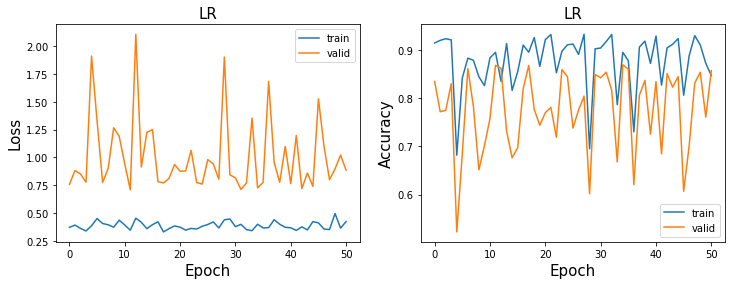

In [52]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [53]:

model_LR = os.listdir('/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample')
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          2
50        46
100       11


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/LR_CHall_LOSSbce_REGfinite_diff1_EPOCH2_REDUCEsum_valbalanced.pt


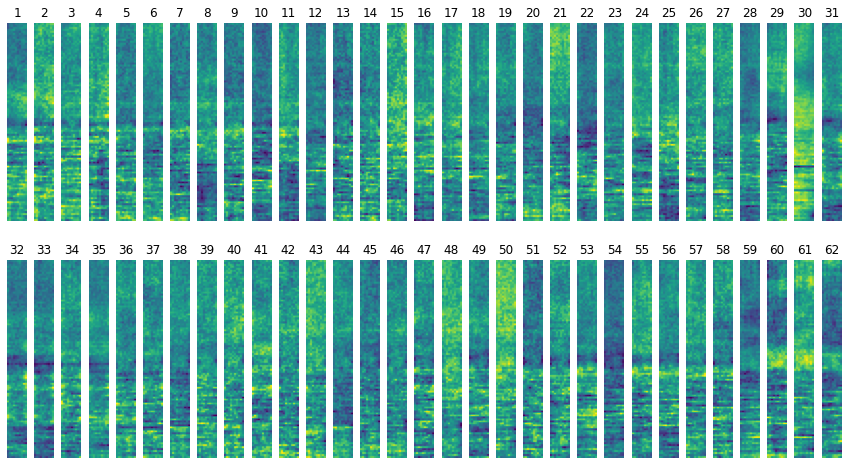

validation loss:0.5700178742408752 accuracy:0.7843355605048256
0.5
test loss:0.526010274887085 accuracy:0.8105296847495599
0.7385182


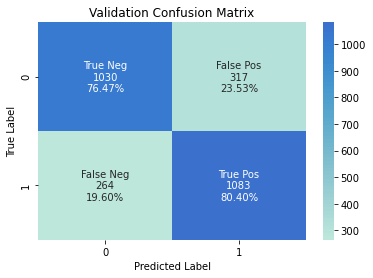

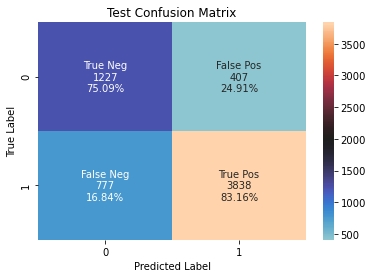

date:180327, rec:005, time:6655.0, label:1.0
Original data 62 CH


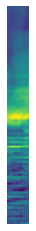

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/LR_CHall_LOSSbce_REGfinite_diff50_EPOCH46_REDUCEsum_valbalanced.pt


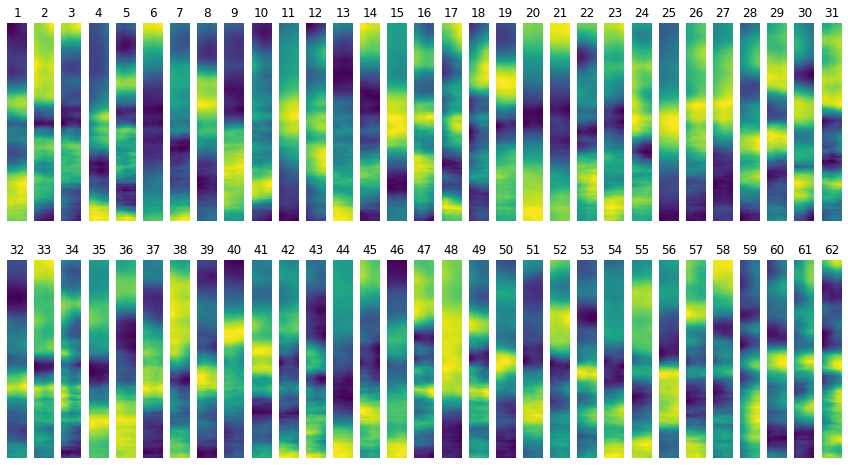

validation loss:0.6265590190887451 accuracy:0.8723088344469191
0.5
test loss:0.6099870800971985 accuracy:0.8545367258761402
0.7385182


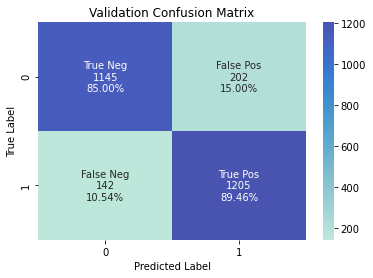

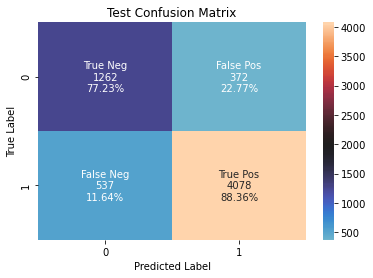

date:180329, rec:004, time:2444.0, label:1.0
Original data 62 CH


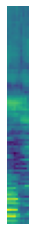

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/LR_CHall_LOSSbce_REGfinite_diff100_EPOCH11_REDUCEsum_valbalanced.pt


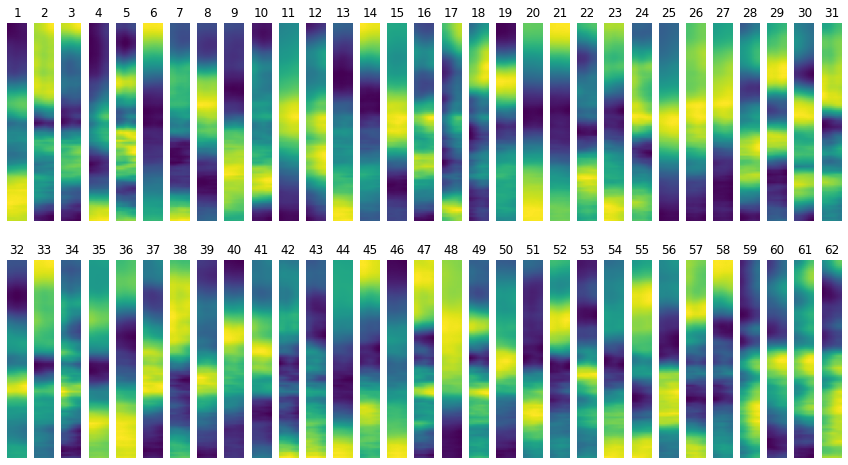

validation loss:0.7092390656471252 accuracy:0.8682256867112101
0.5
test loss:0.6087754368782043 accuracy:0.8559769563130101
0.7385182


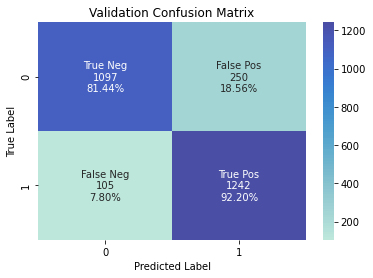

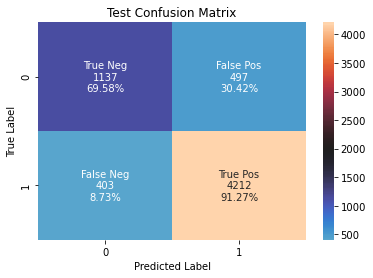

date:180329, rec:002, time:5175.0, label:1.0
Original data 62 CH


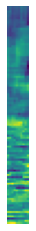

In [54]:
load_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

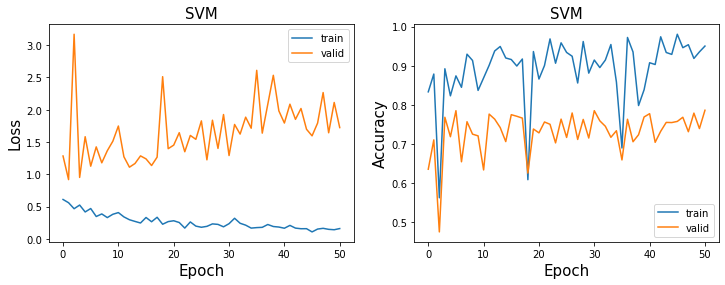

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

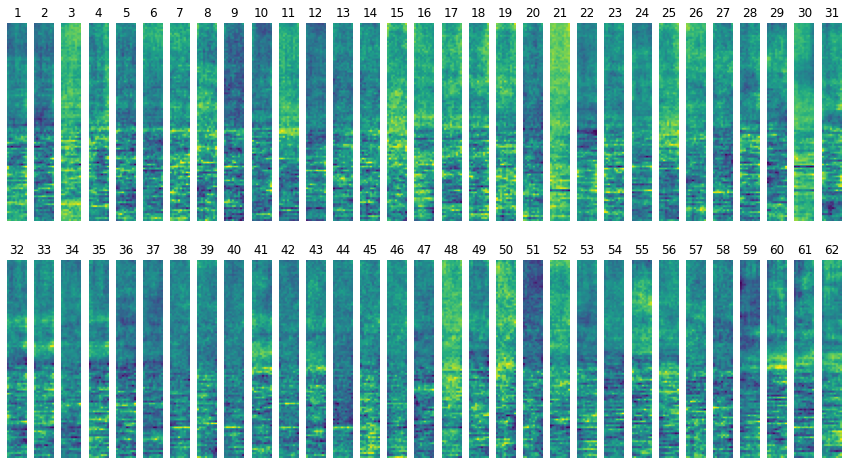

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


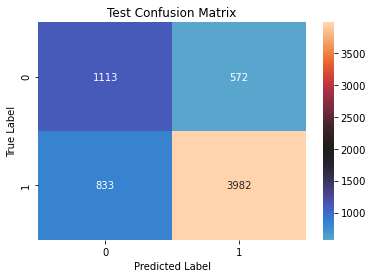

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


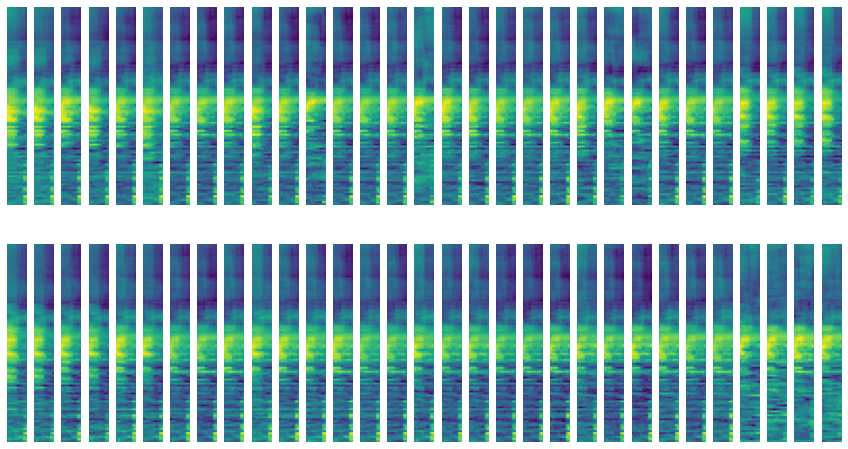

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

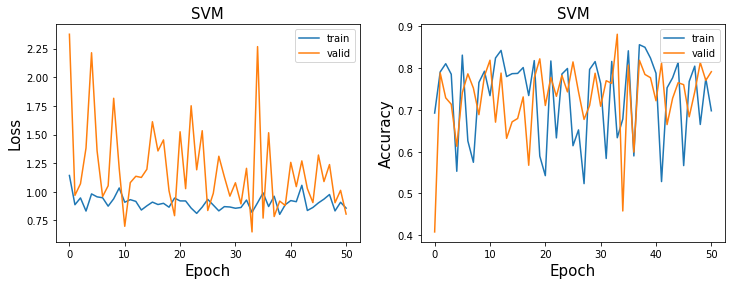

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

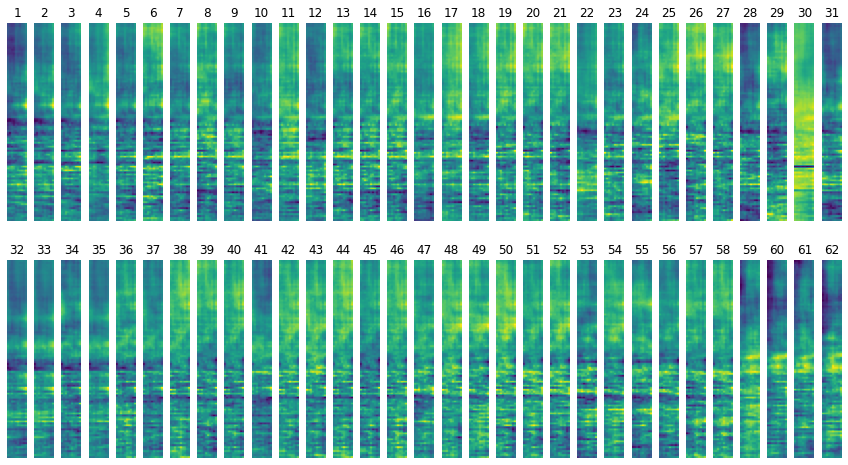

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


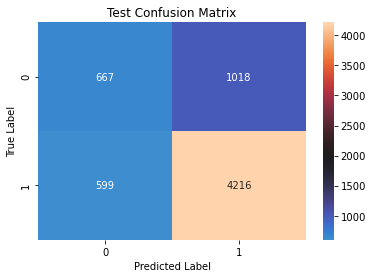

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


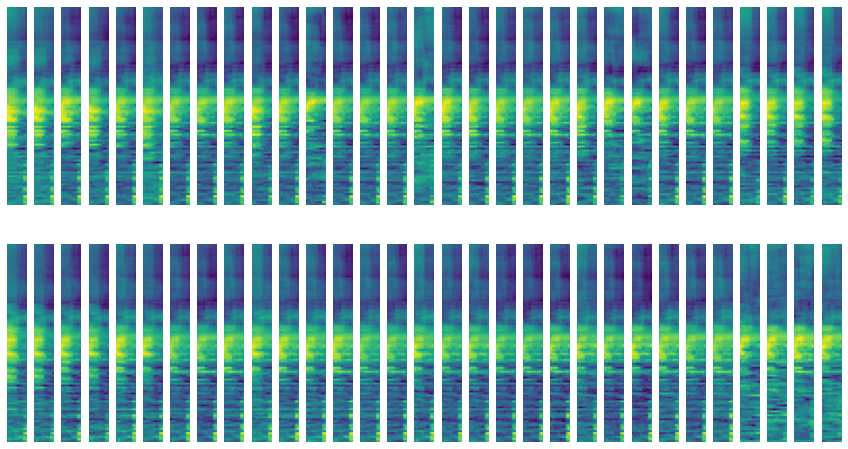

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

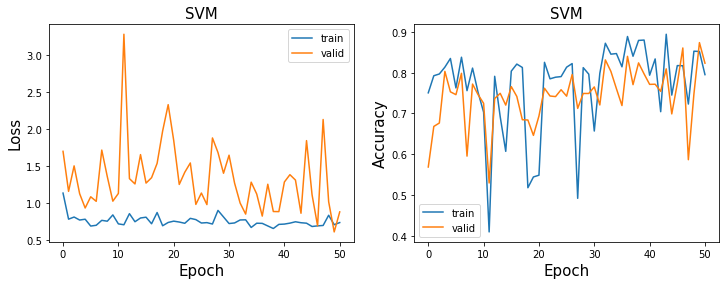

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

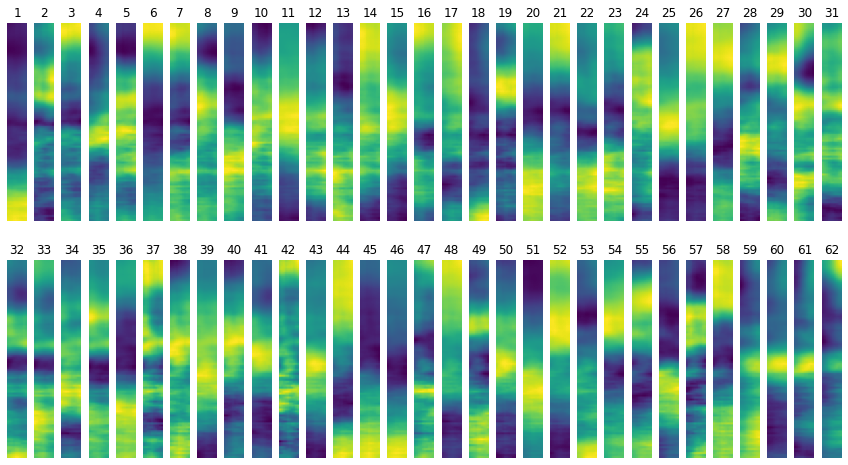

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


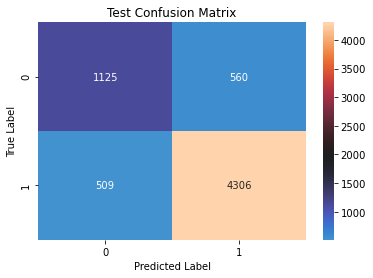

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


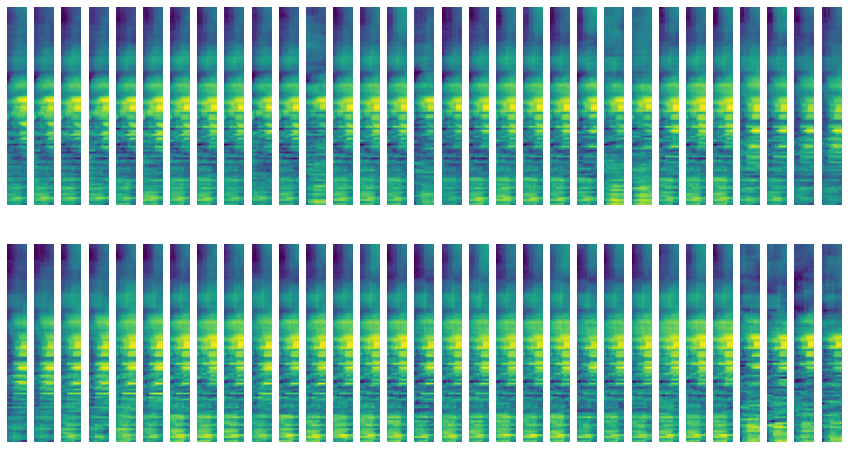

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()